In [2]:
import os
import numpy as np
import pandas as pd
import nltk
import warnings

In [3]:
df = pd.read_csv("Restaurant_and_Food_Establishment_Inspections__October_2016_to_Present.csv")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,70,78,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(df)

['Restaurant Name',
 'Inspection Type',
 'Inspection Date',
 'Inspection Score',
 'Street Number',
 'Street Name',
 'Street Direction',
 'Street Type',
 'Street Unit',
 'Street Address',
 'Zip Code',
 'Violation Description - 1',
 'Violation Points - 1',
 'Violation Detail - 1',
 'Violation Memo - 1',
 'Violation Description - 2',
 'Violation Points - 2',
 'Violation Detail - 2',
 'Violation Memo - 2',
 'Violation Description - 3',
 'Violation Points - 3',
 'Violation Detail - 3',
 'Violation Memo - 3',
 'Violation Description - 4',
 'Violation Points - 4',
 'Violation Detail - 4',
 'Violation Memo - 4',
 'Violation Description - 5',
 'Violation Points - 5',
 'Violation Detail - 5',
 'Violation Memo - 5',
 'Violation Description - 6',
 'Violation Points - 6',
 'Violation Detail - 6',
 'Violation Memo - 6',
 'Violation Description - 7',
 'Violation Points - 7',
 'Violation Detail - 7',
 'Violation Memo - 7',
 'Violation Description - 8',
 'Violation Points - 8',
 'Violation Detail - 8',

In [5]:
def drop_col(x):
    l = []
    for col in df.columns:
        if 'Violation' in col or 'Score' in col:
            l.append(col)
    return l

drop = drop_col(df.columns)

final = df[drop]
final.head(10)


Inspection Score                          Violation Description - 1  \
0                81  *03 Food products not maintained at 135øF or a...   
1                90                  *31 Individual, disposable towels   
2                91               *22 Handlers-Certificate Not On Site   
3                83  *07 Food safe, good condition, unadulterated, ...   
4               100                                                NaN   
5               100                                                NaN   
6                81      *29 Food thermometers provided and accessible   
7                80                          *10 Clean Sight and Touch   
8                89  *09  Ice used as exterior coolant, prohibited ...   
9               100                                                NaN   

   Violation Points - 1                               Violation Detail - 1  \
0                   3.0  228.75  Food.          Time and temperature co...   
1                   2.0  228.175  Physical Facilities.          Handwas...   
2                   2.0  Sec. 17-2.2(d)(1)(A)     (d) Food handlers.  (...   
3                   3.0  228.61  Food.         Condition safe, unadulte...   
4                   NaN                                                NaN   
5                   NaN                                                NaN   
6                   2.0  228.108  Equipment, Utensils, and Linens.     ...   
7                   3.0  228.113  Equipment, Utensils, and Linens.     ...   
8                   3.0  228.67  Food.          Preventing contaminatio...   
9                   NaN                                                NaN   

                                  Violation Memo - 1  \
0  Chicken stored in oven not keeping temps above...   
1                                   Both bottom bars   
2  need food handler cards for employees if not m...   
3  observed container put directly on rice , chee...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                             Clean inside microwave   
8      Employee storing water bottle in ice machine.   
9                                                NaN   

                           Violation Description - 2  Violation Points - 2  \
0  *09  Food protected cross contamination arrang...                   3.0   
1  *46 A ware washing sink not used for hand wash...                   1.0   
2                             *21 RFSM - Not On Site                   2.0   
3  *09  Food protected cross contamination arrang...                   3.0   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
6            *01 Cooling -- within 2 hours, 135-70øF                   3.0   
7                            *20 Grease Trap Tickets                   3.0   
8                          *10 Clean Sight and Touch                   3.0   
9                                                NaN                   NaN   

                                Violation Detail - 2  \
0  228.66  Food.          Preventing food and ing...   
1  228.111  Equipment, Utensils, and Linens.     ...   
2  Sec. 17-2.2(c)(1)(D)      (c) Registered food ...   
3  228.66  Food.          Preventing food and ing...   
4                                                NaN   
5                                                NaN   
6  228.75  Food.          Time and temperature co...   
7  Ch.19-126.5(c))     A producer shall sign the ...   
8  228.113  Equipment, Utensils, and Linens.     ...   
9                                                NaN   

                                  Violation Memo - 2  \
0  Eggs next to produce, raw chicken next to RTe ...   
1                                                NaN   
2                                  CFM certs expired   
3           

In [6]:
def drop_col(x):
    l = []
    for col in final.columns:
        if 'Points' in col or 'Score' in col:
            l.append(col)
    return l

drop = drop_col(final.columns)

numDF = final[drop]
numDF.head(10)

Inspection Score  Violation Points - 1  Violation Points - 2  \
0                81                   3.0                   3.0   
1                90                   2.0                   1.0   
2                91                   2.0                   2.0   
3                83                   3.0                   3.0   
4               100                   NaN                   NaN   
5               100                   NaN                   NaN   
6                81                   2.0                   3.0   
7                80                   3.0                   3.0   
8                89                   3.0                   3.0   
9               100                   NaN                   NaN   

   Violation Points - 3  Violation Points - 4  Violation Points - 5  \
0                   2.0                   2.0                   2.0   
1                   3.0                   3.0                   1.0   
2                   2.0                   1.0                   1.0   
3                   2.0                   3.0                   3.0   
4                   NaN                   NaN                   NaN   
5                   NaN                   NaN                   NaN   
6                   2.0                   3.0                   2.0   
7                   2.0                   2.0                   2.0   
8                   2.0                   2.0                   1.0   
9                   NaN                   NaN                   NaN   

   Violation Points - 6  Violation Points - 7  Violation Points - 8  \
0                   2.0                   1.0                   1.0   
1                   NaN                   NaN                   NaN   
2                   1.0                   NaN                   NaN   
3                   2.0                   1.0                   NaN   
4                   NaN                   NaN                   NaN   
5                   NaN                   NaN                   NaN   
6                   1.0                   3.0                   3.0   
7                   2.0                   1.0                   1.0   
8                   NaN                   NaN                   NaN   
9                   NaN                   NaN                   NaN   

   Violation Points - 9          ...            Violation Points - 16  \
0                   1.0          ...                              NaN   
1                   NaN          ...                              NaN   
2                   NaN          ...                              NaN   
3                   NaN          ...                              NaN   
4                   NaN          ...                              NaN   
5                   NaN          ...                              NaN   
6                   NaN          ...                              NaN   
7                   1.0          ...                              NaN   
8                   NaN          ...                              NaN   
9                   NaN          ...                              NaN   

   Violation Points - 17  Violation Points - 18  Violation Points - 19  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   
5                    NaN                    NaN                    NaN   
6                    NaN                    NaN                    NaN   
7                    NaN                    NaN                    NaN   
8                    NaN                    NaN                    NaN   
9                    NaN                    NaN                    NaN   

   Violation Points - 20  Violation Points - 21  Violation Points - 22  \
0       

In [7]:
def drop_col(x):
    l = []
    for col in final.columns:
        if 'Description' in col or 'Memo' in col or 'Score' in col or 'Detail' in col:
            l.append(col)
    return l

drop = drop_col(final.columns)

textDF = final[drop]
textDF = textDF.rename(columns={'Violation  Memo - 20': 'Violation Memo - 20'})
textDF.head(10)

Inspection Score                          Violation Description - 1  \
0                81  *03 Food products not maintained at 135øF or a...   
1                90                  *31 Individual, disposable towels   
2                91               *22 Handlers-Certificate Not On Site   
3                83  *07 Food safe, good condition, unadulterated, ...   
4               100                                                NaN   
5               100                                                NaN   
6                81      *29 Food thermometers provided and accessible   
7                80                          *10 Clean Sight and Touch   
8                89  *09  Ice used as exterior coolant, prohibited ...   
9               100                                                NaN   

                                Violation Detail - 1  \
0  228.75  Food.          Time and temperature co...   
1  228.175  Physical Facilities.          Handwas...   
2  Sec. 17-2.2(d)(1)(A)     (d) Food handlers.  (...   
3  228.61  Food.         Condition safe, unadulte...   
4                                                NaN   
5                                                NaN   
6  228.108  Equipment, Utensils, and Linens.     ...   
7  228.113  Equipment, Utensils, and Linens.     ...   
8  228.67  Food.          Preventing contaminatio...   
9                                                NaN   

                                  Violation Memo - 1  \
0  Chicken stored in oven not keeping temps above...   
1                                   Both bottom bars   
2  need food handler cards for employees if not m...   
3  observed container put directly on rice , chee...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                             Clean inside microwave   
8      Employee storing water bottle in ice machine.   
9                                                NaN   

                           Violation Description - 2  \
0  *09  Food protected cross contamination arrang...   
1  *46 A ware washing sink not used for hand wash...   
2                             *21 RFSM - Not On Site   
3  *09  Food protected cross contamination arrang...   
4                                                NaN   
5                                                NaN   
6            *01 Cooling -- within 2 hours, 135-70øF   
7                            *20 Grease Trap Tickets   
8                          *10 Clean Sight and Touch   
9                                                NaN   

                                Violation Detail - 2  \
0  228.66  Food.          Preventing food and ing...   
1  228.111  Equipment, Utensils, and Linens.     ...   
2  Sec. 17-2.2(c)(1)(D)      (c) Registered food ...   
3  228.66  Food.          Preventing food and ing...   
4                                                NaN   
5                                                NaN   
6  228.75  Food.          Time and temperature co...   
7  Ch.19-126.5(c))     A producer shall sign the ...   
8  228.113  Equipment, Utensils, and Linens.     ...   
9                                                NaN   

                                  Violation Memo - 2  \
0  Eggs next to produce, raw chicken next to RTe ...   
1                                                NaN   
2                                  CFM certs expired   
3                        Raw chicken and bell pepper   
4                                                NaN   
5                                                NaN   
6  Blanched wings in the Walk in refrigerator at ...   
7  No grease trap, have grease trap by next visit...   
8                             Clean soda dispensers.   
9                                                NaN   

                           Violation Description - 3  \
0               *22 Handlers-Certificate Not On

In [8]:
textDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 76 columns):
Inspection Score              32871 non-null int64
Violation Description - 1     30580 non-null object
Violation Detail - 1          30421 non-null object
Violation Memo - 1            22077 non-null object
Violation Description - 2     27597 non-null object
Violation Detail - 2          27445 non-null object
Violation Memo - 2            19860 non-null object
Violation Description - 3     23983 non-null object
Violation Detail - 3          23855 non-null object
Violation Memo - 3            17457 non-null object
Violation Description - 4     20329 non-null object
Violation Detail - 4          20199 non-null object
Violation Memo - 4            14935 non-null object
Violation Description - 5     16774 non-null object
Violation Detail - 5          16639 non-null object
Violation Memo - 5            12438 non-null object
Violation Description - 6     13512 non-null object
Violatio

In [9]:
numDF.describe()

Inspection Score  Violation Points - 1  Violation Points - 2  \
count      32871.000000          30580.000000          27597.000000   
mean          90.423626              1.991629              1.913831   
std            7.041163              0.857899              0.835791   
min           -5.000000              1.000000              1.000000   
25%           86.000000              1.000000              1.000000   
50%           92.000000              2.000000              2.000000   
75%           96.000000              3.000000              3.000000   
max          100.000000              4.000000              3.000000   

       Violation Points - 3  Violation Points - 4  Violation Points - 5  \
count          23983.000000          20329.000000          16774.000000   
mean               1.862194              1.828718              1.795517   
std                0.827443              0.822009              0.814692   
min                1.000000              1.000000              1.000000   
25%                1.000000              1.000000              1.000000   
50%                2.000000              2.000000              2.000000   
75%                3.000000              3.000000              3.000000   
max                4.000000              3.000000              3.000000   

       Violation Points - 6  Violation Points - 7  Violation Points - 8  \
count          13512.000000          10654.000000           8159.000000   
mean               1.772425              1.762624              1.759897   
std                0.818121              0.819748              0.825156   
min                1.000000              1.000000              1.000000   
25%                1.000000              1.000000              1.000000   
50%                2.000000              2.000000              2.000000   
75%                2.000000              2.000000              2.000000   
max                3.000000              4.000000              3.000000   

       Violation Points - 9          ...            Violation Points - 16  \
count           5986.000000          ...                       420.000000   
mean               1.729034          ...                         1.750000   
std                0.827725          ...                         0.847219   
min                1.000000          ...                         1.000000   
25%                1.000000          ...                         1.000000   
50%                1.000000          ...                         1.000000   
75%                2.000000          ...                         3.000000   
max                3.000000          ...                         3.000000   

       Violation Points - 17  Violation Points - 18  Violation Points - 19  \
count             268.000000             177.000000              97.000000   
mean                1.623134               1.694915               1.628866   
std                 0.804800               0.788862               0.807769   
min                 1.000000               1.000000               1.000000   
25%                 1.000000               1.000000               1.000000   
50%                 1.000000               1.000000               1.000000   
75%                 2.000000               2.000000               2.000000   
max                 3.000000               3.000000               3.000000   

       Violation Points - 20  Violation Points - 21  Violation Points - 22  \
count              64.000000              35.000000              16.000000   
mean                1.796875               1.885714               1.437500   
std                 0.894067               0.900047               0.629153   
min                 1.000000               1.000000               1.000000   
25%                 1.000000               1.000000               1.000000   
50%                 1.000000               2.000000               1.000000   
75%                 3.000000               3.000000               2.0000

In [10]:
numDF.isnull().sum()

Inspection Score             0
Violation Points - 1      2291
Violation Points - 2      5274
Violation Points - 3      8888
Violation Points - 4     12542
Violation Points - 5     16097
Violation Points - 6     19359
Violation Points - 7     22217
Violation Points - 8     24712
Violation Points - 9     26885
Violation Points - 10    28687
Violation Points - 11    30087
Violation Points - 12    31101
Violation Points - 13    31694
Violation Points - 14    32010
Violation Points - 15    32254
Violation Points - 16    32451
Violation Points - 17    32603
Violation Points - 18    32694
Violation Points - 19    32774
Violation Points - 20    32807
Violation Points - 21    32836
Violation Points - 22    32855
Violation Points - 23    32862
Violation Points - 24    32865
Violation Points - 25    32868
dtype: int64

In [11]:
numDF[numDF['Inspection Score'] < 0]

Inspection Score  Violation Points - 1  Violation Points - 2  \
26151                -5                   2.0                   1.0   

       Violation Points - 3  Violation Points - 4  Violation Points - 5  \
26151                   1.0                   1.0                   NaN   

       Violation Points - 6  Violation Points - 7  Violation Points - 8  \
26151                   NaN                   NaN                   NaN   

       Violation Points - 9          ...            Violation Points - 16  \
26151                   NaN          ...                              NaN   

       Violation Points - 17  Violation Points - 18  Violation Points - 19  \
26151                    NaN                    NaN                    NaN   

       Violation Points - 20  Violation Points - 21  Violation Points - 22  \
26151                    NaN                    NaN                    NaN   

       Violation Points - 23  Violation Points - 24  Violation Points - 25  
26151                    NaN                    NaN                    NaN  

[1 rows x 26 columns]

In [12]:
numDF = numDF.replace(-5,95)
numDF.iloc[26151,0]

95

In [13]:
numDF.describe()

Inspection Score  Violation Points - 1  Violation Points - 2  \
count      32871.000000          30580.000000          27597.000000   
mean          90.426668              1.991629              1.913831   
std            7.021508              0.857899              0.835791   
min           51.000000              1.000000              1.000000   
25%           86.000000              1.000000              1.000000   
50%           92.000000              2.000000              2.000000   
75%           96.000000              3.000000              3.000000   
max          100.000000              4.000000              3.000000   

       Violation Points - 3  Violation Points - 4  Violation Points - 5  \
count          23983.000000          20329.000000          16774.000000   
mean               1.862194              1.828718              1.795517   
std                0.827443              0.822009              0.814692   
min                1.000000              1.000000              1.000000   
25%                1.000000              1.000000              1.000000   
50%                2.000000              2.000000              2.000000   
75%                3.000000              3.000000              3.000000   
max                4.000000              3.000000              3.000000   

       Violation Points - 6  Violation Points - 7  Violation Points - 8  \
count          13512.000000          10654.000000           8159.000000   
mean               1.772425              1.762624              1.759897   
std                0.818121              0.819748              0.825156   
min                1.000000              1.000000              1.000000   
25%                1.000000              1.000000              1.000000   
50%                2.000000              2.000000              2.000000   
75%                2.000000              2.000000              2.000000   
max                3.000000              4.000000              3.000000   

       Violation Points - 9          ...            Violation Points - 16  \
count           5986.000000          ...                       420.000000   
mean               1.729034          ...                         1.750000   
std                0.827725          ...                         0.847219   
min                1.000000          ...                         1.000000   
25%                1.000000          ...                         1.000000   
50%                1.000000          ...                         1.000000   
75%                2.000000          ...                         3.000000   
max                3.000000          ...                         3.000000   

       Violation Points - 17  Violation Points - 18  Violation Points - 19  \
count             268.000000             177.000000              97.000000   
mean                1.623134               1.694915               1.628866   
std                 0.804800               0.788862               0.807769   
min                 1.000000               1.000000               1.000000   
25%                 1.000000               1.000000               1.000000   
50%                 1.000000               1.000000               1.000000   
75%                 2.000000               2.000000               2.000000   
max                 3.000000               3.000000               3.000000   

       Violation Points - 20  Violation Points - 21  Violation Points - 22  \
count              64.000000              35.000000              16.000000   
mean                1.796875               1.885714               1.437500   
std                 0.894067               0.900047               0.629153   
min                 1.000000               1.000000               1.000000   
25%                 1.000000               1.000000               1.000000   
50%                 1.000000               2.000000               1.000000   
75%                 3.000000               3.000000               2.0000

In [14]:
numDF.fillna(0,inplace=True)


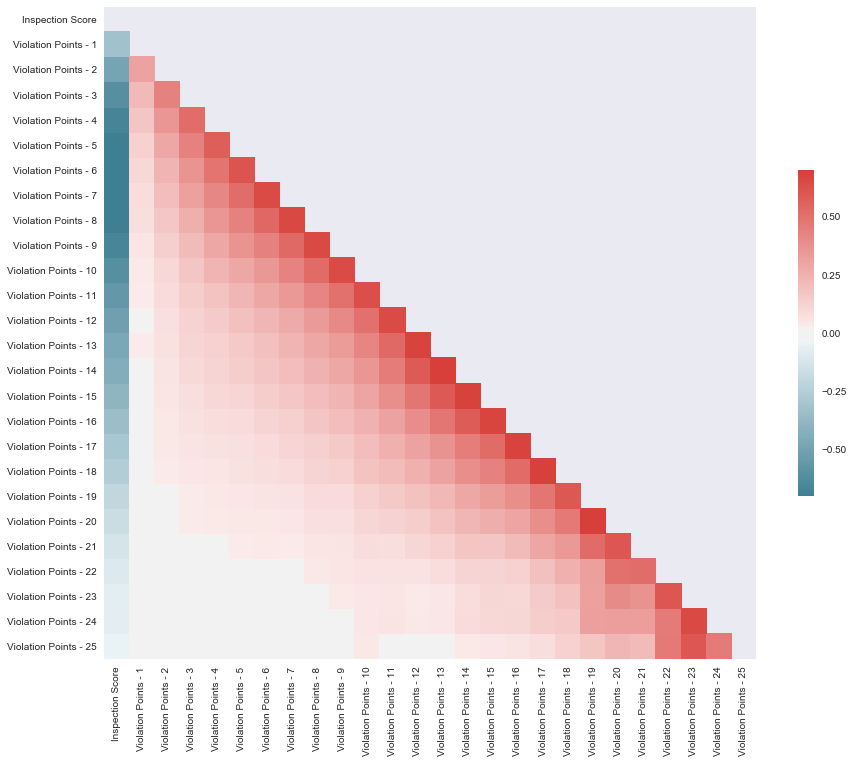

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

temp=numDF
# Compute the correlation matrix
corr = temp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,13, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.0, cbar_kws={"shrink":0.5}, vmax = 0.7, vmin =-0.7)

In [16]:
numDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 26 columns):
Inspection Score         32871 non-null int64
Violation Points - 1     32871 non-null float64
Violation Points - 2     32871 non-null float64
Violation Points - 3     32871 non-null float64
Violation Points - 4     32871 non-null float64
Violation Points - 5     32871 non-null float64
Violation Points - 6     32871 non-null float64
Violation Points - 7     32871 non-null float64
Violation Points - 8     32871 non-null float64
Violation Points - 9     32871 non-null float64
Violation Points - 10    32871 non-null float64
Violation Points - 11    32871 non-null float64
Violation Points - 12    32871 non-null float64
Violation Points - 13    32871 non-null float64
Violation Points - 14    32871 non-null float64
Violation Points - 15    32871 non-null float64
Violation Points - 16    32871 non-null float64
Violation Points - 17    32871 non-null float64
Violation Points - 18    3287

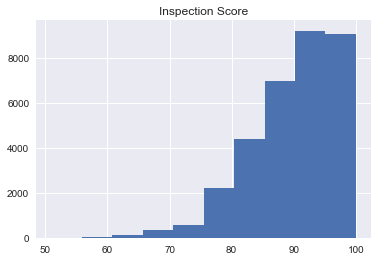

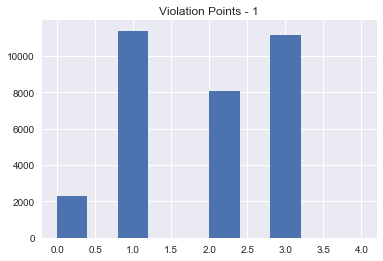

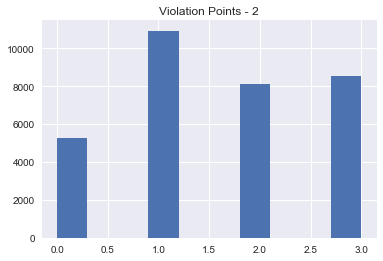

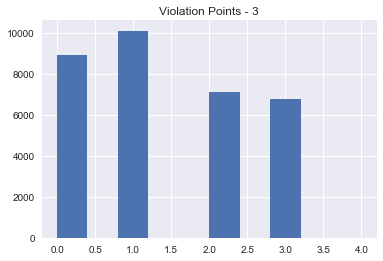

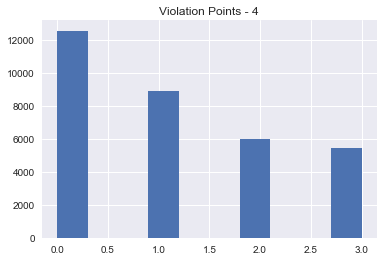

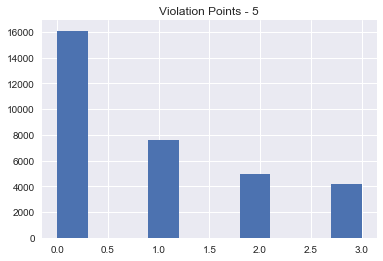

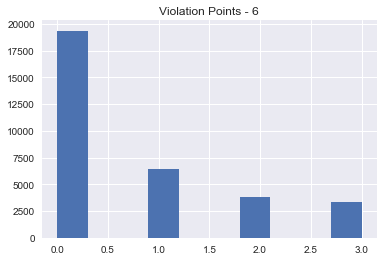

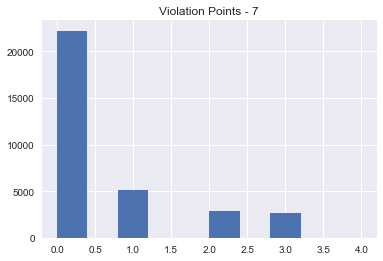

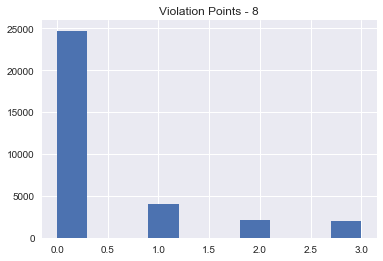

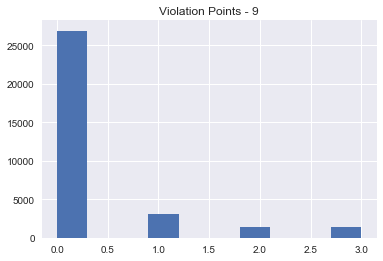

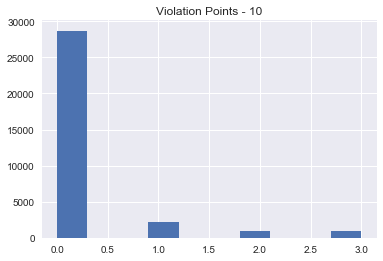

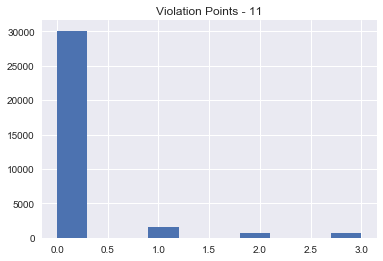

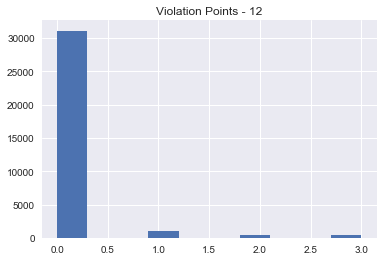

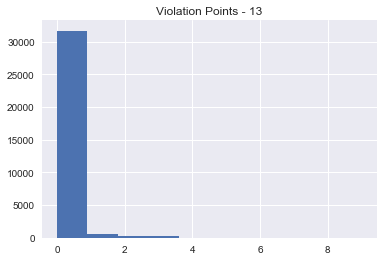

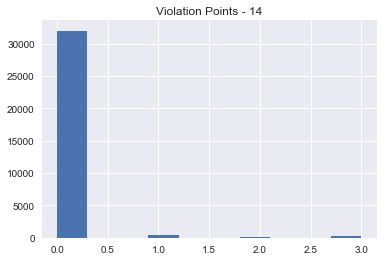

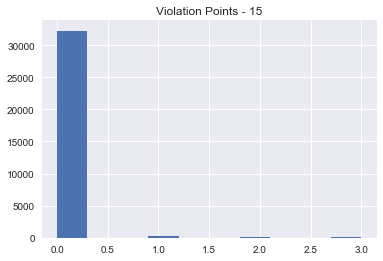

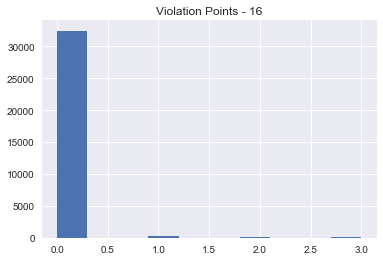

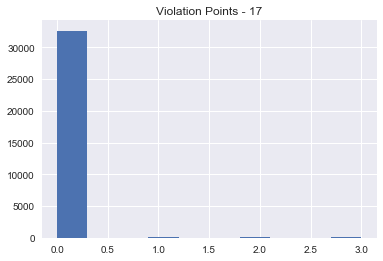

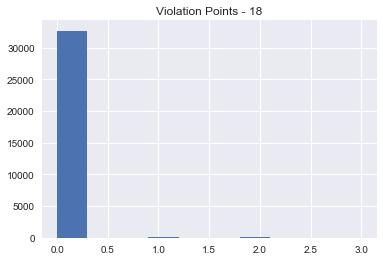

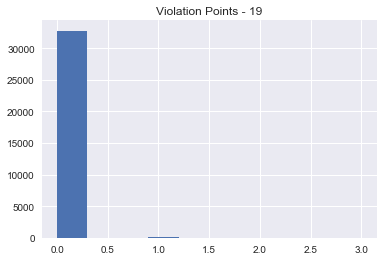

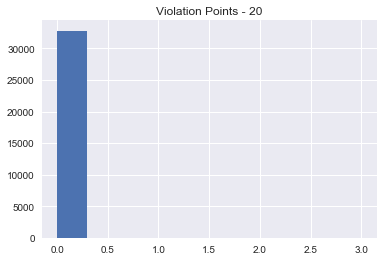

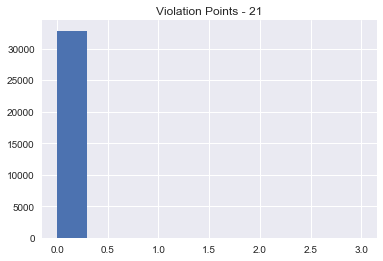

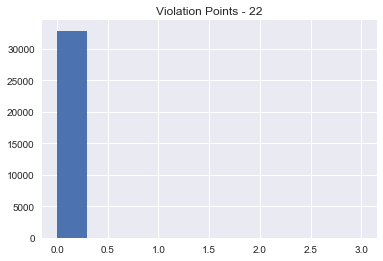

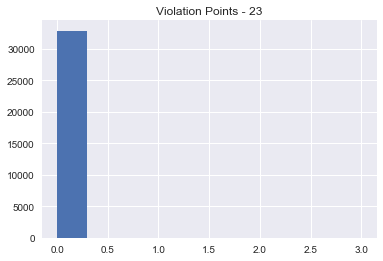

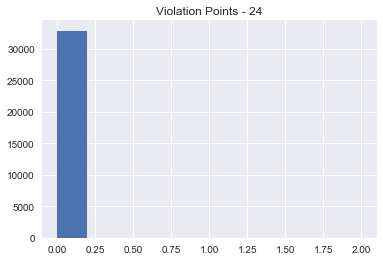

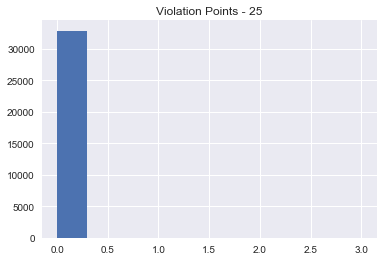

In [17]:
cols= numDF.columns
for i in cols:
    numDF.hist(i)
    plt.show()

In [18]:
numDF.drop(numDF[['Violation Points - 20','Violation Points - 21','Violation Points - 22','Violation Points - 23','Violation Points - 24','Violation Points - 25']],axis=1, inplace=True)

In [19]:
numDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 20 columns):
Inspection Score         32871 non-null int64
Violation Points - 1     32871 non-null float64
Violation Points - 2     32871 non-null float64
Violation Points - 3     32871 non-null float64
Violation Points - 4     32871 non-null float64
Violation Points - 5     32871 non-null float64
Violation Points - 6     32871 non-null float64
Violation Points - 7     32871 non-null float64
Violation Points - 8     32871 non-null float64
Violation Points - 9     32871 non-null float64
Violation Points - 10    32871 non-null float64
Violation Points - 11    32871 non-null float64
Violation Points - 12    32871 non-null float64
Violation Points - 13    32871 non-null float64
Violation Points - 14    32871 non-null float64
Violation Points - 15    32871 non-null float64
Violation Points - 16    32871 non-null float64
Violation Points - 17    32871 non-null float64
Violation Points - 18    3287

In [20]:
X_data = numDF.iloc[:, 1:]
y_target = numDF.iloc[:, 0]



In [21]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 19 columns):
Violation Points - 1     32871 non-null float64
Violation Points - 2     32871 non-null float64
Violation Points - 3     32871 non-null float64
Violation Points - 4     32871 non-null float64
Violation Points - 5     32871 non-null float64
Violation Points - 6     32871 non-null float64
Violation Points - 7     32871 non-null float64
Violation Points - 8     32871 non-null float64
Violation Points - 9     32871 non-null float64
Violation Points - 10    32871 non-null float64
Violation Points - 11    32871 non-null float64
Violation Points - 12    32871 non-null float64
Violation Points - 13    32871 non-null float64
Violation Points - 14    32871 non-null float64
Violation Points - 15    32871 non-null float64
Violation Points - 16    32871 non-null float64
Violation Points - 17    32871 non-null float64
Violation Points - 18    32871 non-null float64
Violation Points - 19    32

In [22]:
y_target.shape

(32871,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, shuffle = True, test_size = 0.3,random_state =0)

In [24]:
X_train.shape, y_train.shape

((23009, 19), (23009,))

In [25]:
X_test.shape, y_test.shape

((9862, 19), (9862,))

In [26]:
report_table = []

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lreg = LinearRegression()

In [28]:
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Train Score {:.2f}".format(scores.mean()))
lreg.fit(X_train, y_train)
test_score = lreg.score(X_test,y_test) 
print("Test Score {:.2f}".format(test_score))

Cross-validation scores: [0.99741093 0.99715338 0.99927003 0.99854279 0.99834794]
Train Score 1.00
Test Score 1.00


In [29]:
report_table.append({'Model_name':'LinearRegression',
                    'Paramater':'No Parameter',
                    'Training_score': scores.mean(),
                    'Test Score':test_score})

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_SGD = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Parameter grid:\n{}".format(param_SGD))
grid_SGD = GridSearchCV(estimator = SGDRegressor(), param_grid = param_SGD, cv=5, return_train_score=True)

Parameter grid:
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}


In [31]:
grid_SGD.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
print("CV result: {}".format(grid_SGD.cv_results_['mean_test_score']))
#print("Best cross-validation score: {:.2f}".format(grid_SGD.best_score_))
print("Best parameters: {}".format(grid_SGD.best_params_))
print("Training Score: {}".format(grid_SGD.score(X_train, y_train)))
print("Testing Score: {}".format(grid_SGD.score(X_test, y_test)))

CV result: [-9.01277745e+19 -1.67427581e+20  9.98131350e-01  9.98131937e-01
  9.98133102e-01  9.98133190e-01]
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Training Score: 0.9981545535428331
Testing Score: 0.9967162812001575


In [33]:
report_table.append({'Model_name':'SGDReg',
                    'Paramater':grid_SGD.best_params_,
                    'Training_score': grid_SGD.score(X_train, y_train),
                    'Test Score':grid_SGD.score(X_test, y_test)})

In [34]:
from sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
lreg_poly = LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores_train = cross_val_score(lreg_poly, X_train_poly, y_train, cv=5)
    train_score_list.append(scores_train.mean())
    lreg_poly.fit(X_train_poly,y_train)
    scores_test = lreg_poly.score(X_test_poly,y_test)
    test_score_list.append(scores_test)

print(train_score_list)
print(test_score_list)

[0.9981450133457637, 0.9975579409134767]
[0.996728038445289, 0.996110629096724]


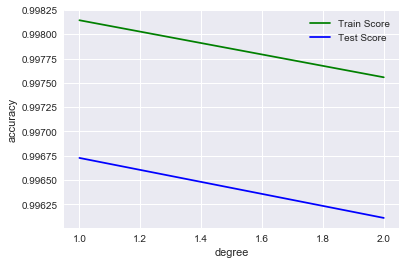

In [35]:
%matplotlib inline
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [36]:
report_table.append({'Model_name':'PolyReg',
                    'Paramater':{'degree':1},
                    'Training_score':train_score_list[0],
                    'Test Score':test_score_list[0]
                    })

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge(random_state=0)
param_Ridge = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Ridge))
grid_Ridge = GridSearchCV(estimator = model,param_grid = param_Ridge, cv=5, return_train_score=True,scoring='r2')

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [38]:
grid_Ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

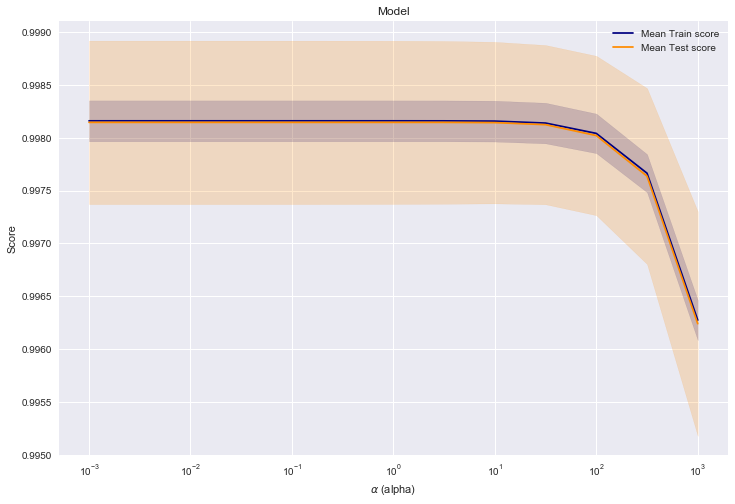

In [39]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Ridge.cv_results_["mean_train_score"]
train_scores_std = grid_Ridge.cv_results_["std_train_score"]
test_scores_mean = grid_Ridge.cv_results_["mean_test_score"]
test_scores_std = grid_Ridge.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [40]:
print("Best cross-validation score: {:.2f}".format(grid_Ridge.best_score_))
print("Best parameters: {}".format(grid_Ridge.best_params_))
print("Training Score: {}".format(grid_Ridge.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Ridge.score(X_test, y_test)))

Best cross-validation score: 1.00
Best parameters: {'alpha': 1.0}
Training Score: 0.9981567476507198
Testing Score: 0.9967268305745269


In [41]:
report_table.append({'Model_name':'Ridge',
                    'Paramater':grid_Ridge.best_params_,
                    'Training_score':grid_Ridge.score(X_train, y_train),
                    'Test Score':grid_Ridge.score(X_test, y_test)
                    })

In [42]:
from  sklearn.linear_model import Lasso
model_Lasso = Lasso(random_state=0)
param_Lasso = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Lasso))
grid_Lasso = GridSearchCV(model_Lasso, param_grid = param_Lasso, cv=5, return_train_score=True)

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [43]:
grid_Lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

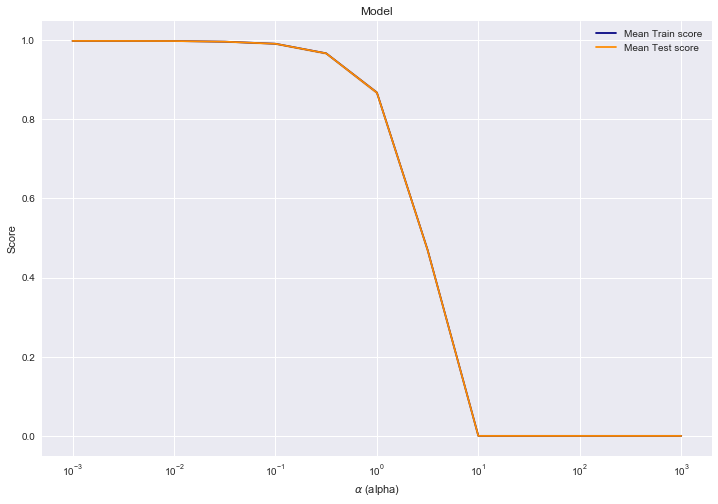

In [44]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Lasso.cv_results_["mean_train_score"]
train_scores_std = grid_Lasso.cv_results_["std_train_score"]
test_scores_mean = grid_Lasso.cv_results_["mean_test_score"]
test_scores_std = grid_Lasso.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [45]:
print("Best cross-validation score: {:.2f}".format(grid_Lasso.best_score_))
print("Best parameters: {}".format(grid_Lasso.best_params_))
print("Training Score: {}".format(grid_Lasso.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Lasso.score(X_test, y_test)))

Best cross-validation score: 1.00
Best parameters: {'alpha': 0.001}
Training Score: 0.9981545267048861
Testing Score: 0.9967069796407368


In [46]:
report_table.append({'Model_name':'Lasso',
                    'Paramater':grid_Lasso.best_params_,
                    'Training_score':grid_Lasso.score(X_train, y_train),
                    'Test Score':grid_Lasso.score(X_test, y_test)
                    })

In [47]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
param_KNN = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid:\n{}".format(param_KNN))
grid_KNN = GridSearchCV(model_KNN, param_grid = param_KNN, cv=5, return_train_score=True)

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [48]:
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

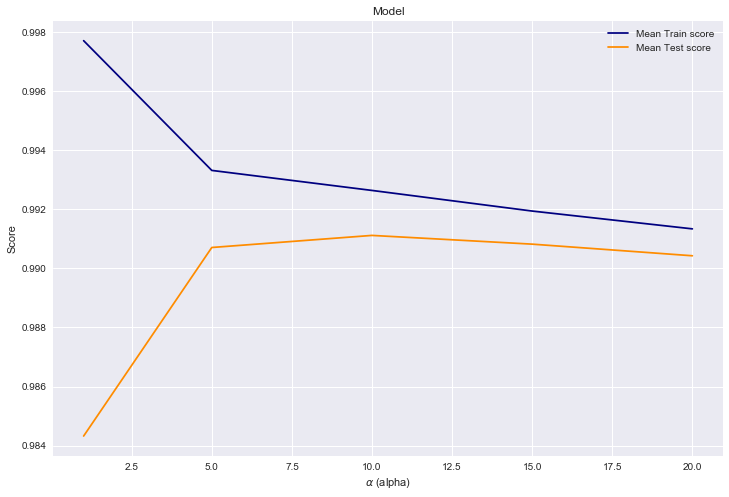

In [49]:
nearest_neighbours = [1, 5, 10, 15, 20]

train_scores_mean = grid_KNN.cv_results_["mean_train_score"]
train_scores_std = grid_KNN.cv_results_["std_train_score"]
test_scores_mean = grid_KNN.cv_results_["mean_test_score"]
test_scores_std = grid_KNN.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.plot(nearest_neighbours, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #train_scores_mean - train_scores_std,
                       #train_scores_mean + train_scores_std,
                       #alpha=0.2,
                       #color='navy')
plt.plot(nearest_neighbours, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #test_scores_mean - test_scores_std,
                       #test_scores_mean + test_scores_std,
                       #alpha=0.2,
                       #color='darkorange')
plt.legend(loc='best')
plt.show()

In [50]:
print("Best cross-validation score: {:.2f}".format(grid_KNN.best_score_))
print("Best parameters: {}".format(grid_KNN.best_params_))
print("Training Score: {}".format(grid_KNN.score(X_train, y_train)))
print("Testing Score: {}".format(grid_KNN.score(X_test, y_test)))

Best cross-validation score: 0.99
Best parameters: {'n_neighbors': 10}
Training Score: 0.9932224161636921
Testing Score: 0.9900142282273239


In [51]:
report_table.append({'Model_name':'KNN',
                    'Paramater':grid_KNN.best_params_,
                    'Training_score':grid_KNN.score(X_train, y_train),
                    'Test Score':grid_KNN.score(X_test, y_test)
                    })

In [52]:
from sklearn.svm import LinearSVR
model_Linear_SVM = LinearSVR(random_state=0)
param_Linear_SVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(param_Linear_SVM))
grid_Linear_SVM = GridSearchCV(model_Linear_SVM, param_grid = param_Linear_SVM, cv=5, return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [53]:
grid_Linear_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

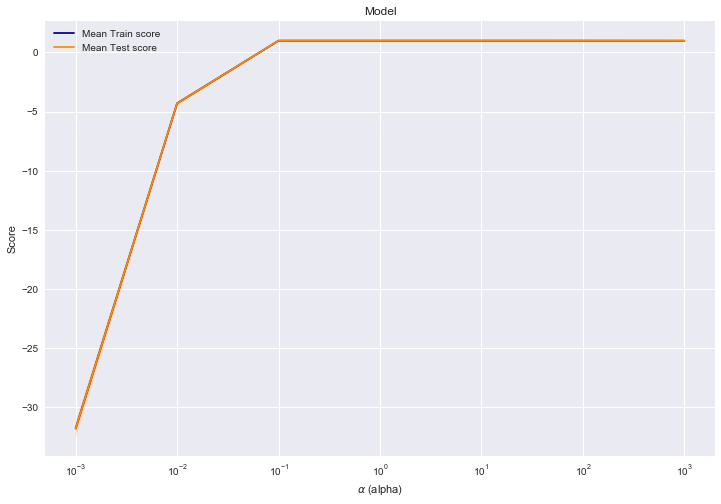

In [54]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores_mean = grid_Linear_SVM.cv_results_["mean_train_score"]
train_scores_std = grid_Linear_SVM.cv_results_["std_train_score"]
test_scores_mean = grid_Linear_SVM.cv_results_["mean_test_score"]
test_scores_std = grid_Linear_SVM.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(C, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [55]:
print("Best cross-validation score: {:.2f}".format(grid_Linear_SVM.best_score_))
print("Best parameters: {}".format(grid_Linear_SVM.best_params_))
print("Training Score: {}".format(grid_Linear_SVM.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Linear_SVM.score(X_test, y_test)))

Best cross-validation score: 1.00
Best parameters: {'C': 1}
Training Score: 0.9980935101231199
Testing Score: 0.996584314264353


In [56]:
report_table.append({'Model_name':'LinearSVR',
                    'Paramater':grid_Linear_SVM.best_params_,
                    'Training_score':grid_Linear_SVM.score(X_train, y_train),
                    'Test Score':grid_Linear_SVM.score(X_test, y_test)
                    })

In [57]:
report = pd.DataFrame(report_table)
report.set_index('Model_name', inplace = True)
report

Paramater  \
Model_name                                                            
LinearRegression                                       No Parameter   
SGDReg            {'learning_rate': 'optimal', 'max_iter': 1000,...   
PolyReg                                               {'degree': 1}   
Ridge                                                {'alpha': 1.0}   
Lasso                                              {'alpha': 0.001}   
KNN                                             {'n_neighbors': 10}   
LinearSVR                                                  {'C': 1}   

                  Test Score  Training_score  
Model_name                                    
LinearRegression    0.996728        0.998145  
SGDReg              0.996716        0.998155  
PolyReg             0.996728        0.998145  
Ridge               0.996727        0.998157  
Lasso               0.996707        0.998155  
KNN                 0.990014        0.993222  
LinearSVR           0.996584        0.998094

In [103]:
textDF = textDF.replace(-5,95)
df_inspection_score = textDF['Inspection Score']
data = textDF[textDF.columns.difference(['Inspection Score'])]

In [104]:
data = data.replace('[^a-zA-Z0-9 ]', '', regex = True)
data.fillna('perfect',inplace=True)
data.head(5)

Violation Description - 1  \
0   03 Food products not maintained at 135F or above   
1                    31 Individual disposable towels   
2                 22 HandlersCertificate Not On Site   
3  07 Food safe good condition unadulterated and ...   
4                                            perfect   

          Violation Description - 10 Violation Description - 11  \
0  42 Dirty nonfood contact surfaces     47 Handwashing signage   
1                            perfect                    perfect   
2                            perfect                    perfect   
3                            perfect                    perfect   
4                            perfect                    perfect   

  Violation Description - 12 Violation Description - 13  \
0                    perfect                    perfect   
1                    perfect                    perfect   
2                    perfect                    perfect   
3                    perfect                    perfect   
4                    perfect                    perfect   

  Violation Description - 14 Violation Description - 15  \
0                    perfect                    perfect   
1                    perfect                    perfect   
2                    perfect                    perfect   
3                    perfect                    perfect   
4                    perfect                    perfect   

  Violation Description - 16 Violation Description - 17  \
0                    perfect                    perfect   
1                    perfect                    perfect   
2                    perfect                    perfect   
3                    perfect                    perfect   
4                    perfect                    perfect   

  Violation Description - 18  \
0                    perfect   
1                    perfect   
2                    perfect   
3                    perfect   
4                    perfect   

                         ...                         Violation Memo - 23  \
0                        ...                                     perfect   
1                        ...                                     perfect   
2                        ...                                     perfect   
3                        ...                                     perfect   
4                        ...                                     perfect   

  Violation Memo - 24 Violation Memo - 25  \
0             perfect             perfect   
1             perfect             perfect   
2             perfect             perfect   
3             perfect             perfect   
4             perfect             perfect   

                                  Violation Memo - 3  \
0  Employees working on grill need Texas Food Han...   
1                          Sour cream at 477 degrees   
2                                need at toilet room   
3                           vegetable chichen cheese   
4                                            perfect   

                               Violation Memo - 4  \
0  Date mark all food that has been cooked in WIC   
1                                       Ice maker   
2                                         perfect   
3                        sanitizer bucket 200 ppm   
4                                         perfect   

                      Violation Memo - 5   Violation Memo - 6  \
0  Need working food thermometer in RICs  No items in HW sink   
1                     Beard nets missing              perfect   
2                clean floors throughout              perfect   
3           observed mold in ice machine  Food holder shelves   
4                                perfect              perfect   

                         Violation Memo - 7  \
0  No peronal drinks next to clean utensils   
1                                   perfect   
2                                   perfect   
3     provide cover for ice bucket bar area   
4                  

In [105]:
data.describe()

Violation Description - 1 Violation Description - 10  \
count                      32871                      32871   
unique                       516                        327   
top                      perfect                    perfect   
freq                        2291                      28687   

       Violation Description - 11 Violation Description - 12  \
count                       32871                      32871   
unique                        290                        253   
top                       perfect                    perfect   
freq                        30087                      31101   

       Violation Description - 13 Violation Description - 14  \
count                       32871                      32871   
unique                        220                        200   
top                       perfect                    perfect   
freq                        31694                      32010   

       Violation Description - 15 Violation Description - 16  \
count                       32871                      32871   
unique                        172                        134   
top                       perfect                    perfect   
freq                        32254                      32451   

       Violation Description - 17 Violation Description - 18  \
count                       32871                      32871   
unique                        115                         88   
top                       perfect                    perfect   
freq                        32603                      32694   

              ...         Violation Memo - 23 Violation Memo - 24  \
count         ...                       32871               32871   
unique        ...                           9                   7   
top           ...                     perfect             perfect   
freq          ...                       32863               32865   

       Violation Memo - 25 Violation Memo - 3 Violation Memo - 4  \
count                32871              32871              32871   
unique                   4              14323              12250   
top                perfect            perfect            perfect   
freq                 32868              15414              17936   

       Violation Memo - 5 Violation Memo - 6 Violation Memo - 7  \
count               32871              32871              32871   
unique              10299               8392               6782   
top               perfect            perfect            perfect   
freq                20433              22762              24779   

       Violation Memo - 8 Violation Memo - 9  
count               32871              32871  
unique               5222               3952  
top               perfect            perfect  
freq                26642              28207  

[4 rows x 75 columns]

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


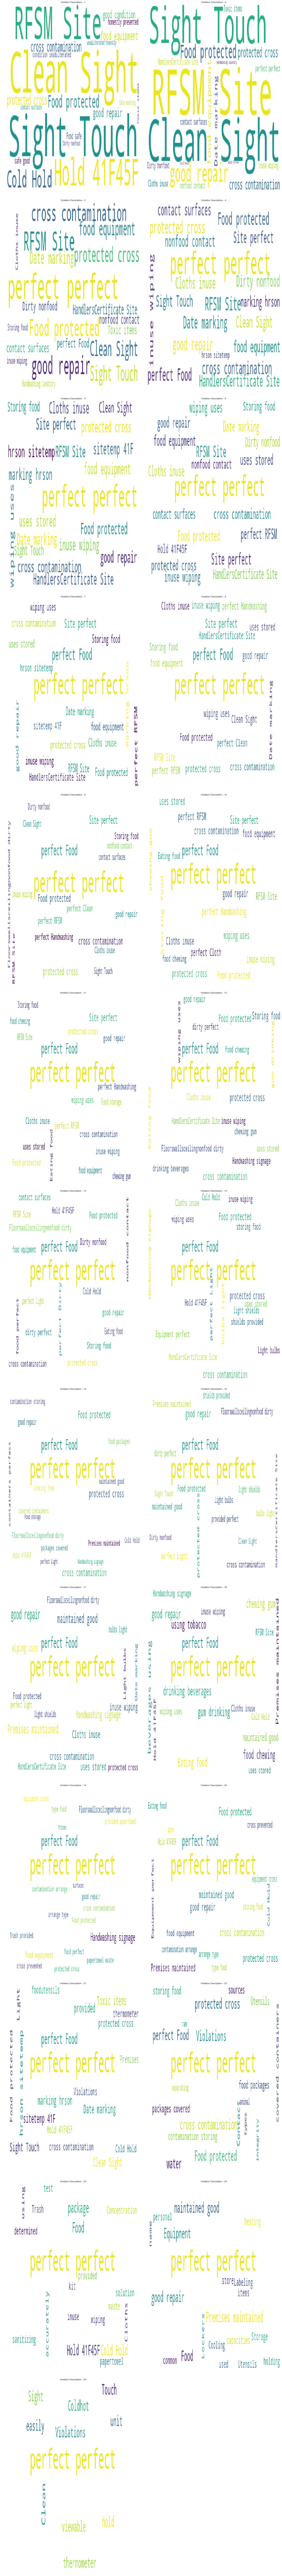

In [107]:
n = 26
fig = plt.figure(figsize=(20, n*7), edgecolor='k')
#figsize=(10, 15), edgecolor='k'

for i in range(1,n):
    #print('Violation Description - ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=20,random_state=0).generate(' '.join(data['Violation Description - ' + str(i)]))
    ax = fig.add_subplot(n/2,2,i)
    ax.imshow(wordcloud, aspect="auto")
    ax.axis('off')
    ax.set_title('Violation Description - ' + str(i))
    #ax.show()
    
plt.tight_layout()
plt.show()

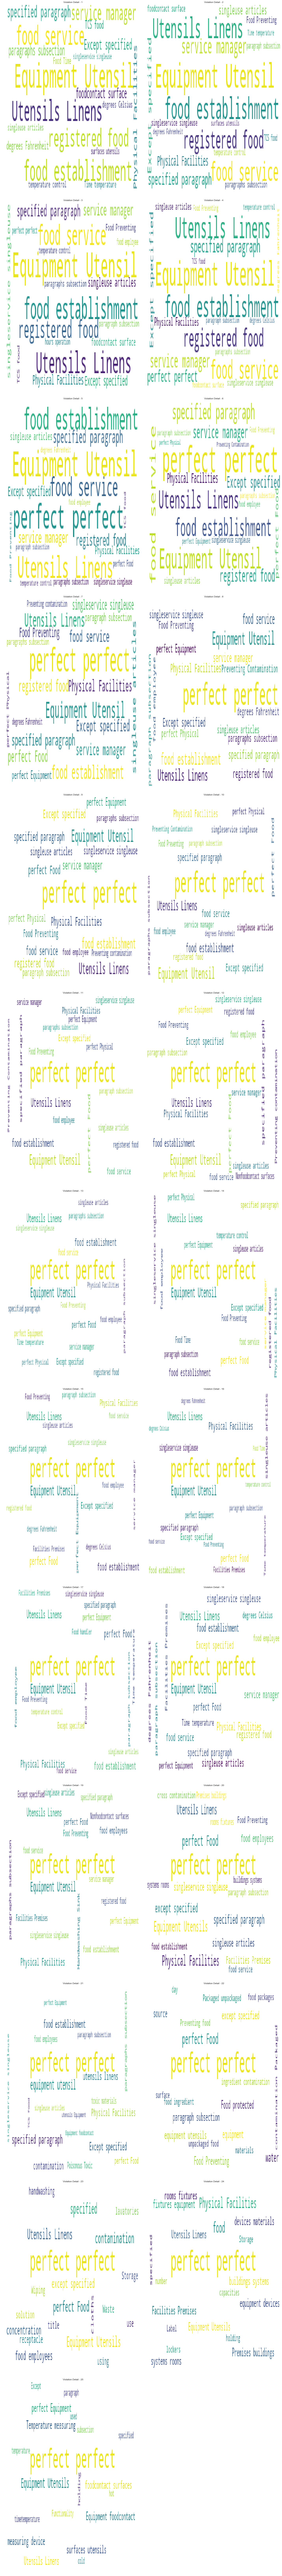

In [108]:
n = 26
fig = plt.figure(figsize=(20, n*7), edgecolor='k')
#figsize=(10, 15), edgecolor='k'

for i in range(1,n):
    #print('Violation Description - ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=20,random_state=0).generate(' '.join(data['Violation Detail - ' + str(i)]))
    ax = fig.add_subplot(n/2,2,i)
    ax.imshow(wordcloud, aspect="auto")
    ax.axis('off')
    ax.set_title('Violation Detail - ' + str(i))
    #ax.show()
    
plt.tight_layout()
plt.show()

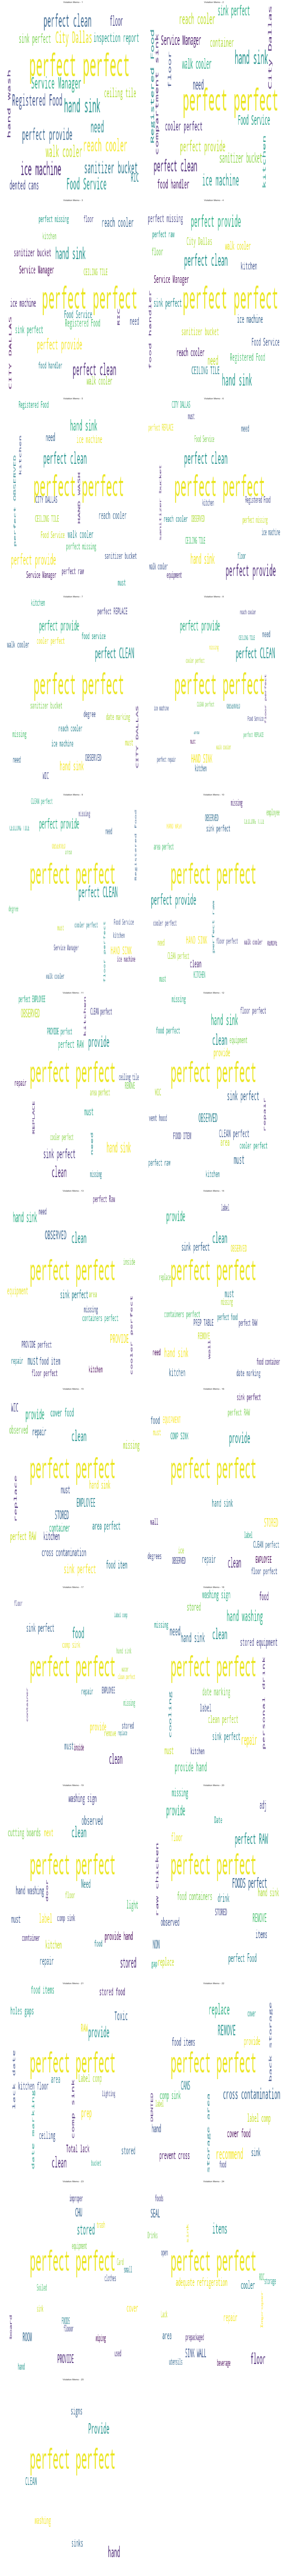

In [109]:
n = 26
fig = plt.figure(figsize=(20, n*7), edgecolor='k')
#figsize=(10, 15), edgecolor='k'

for i in range(1,n):
    #print('Violation Description - ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=20,random_state=0).generate(' '.join(data['Violation Memo - ' + str(i)]))
    ax = fig.add_subplot(n/2,2,i)
    ax.imshow(wordcloud, aspect="auto")
    ax.axis('off')
    ax.set_title('Violation Memo - ' + str(i))
    #ax.show()
    
plt.tight_layout()
plt.show()

In [116]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:


column_types = ['Description', 'Detail', 'Memo']
features = {}
d = {}
n = 26

for col_type in column_types:
    for i in range(1,n):

        tfidf = TfidfVectorizer(stop_words='english',norm= 'l2',max_features=10,max_df=0.7,sublinear_tf = True)
        if not col_type in features:
            features[col_type] = {}
            
        features[col_type][i] = tfidf.fit_transform(data['Violation ' + col_type + ' - ' + str(i)])
        
        if not col_type in d:
            d[col_type] = {}
            
        d[col_type][i] =pd.DataFrame(features[col_type][i].todense(),columns=tfidf.get_feature_names())
        d[col_type][i].head(5)

In [118]:
if 'new_dataframe' in globals():
    del new_dataframe


column_types = ['Description', 'Detail', 'Memo']


for col_type in column_types:
    for i in range(1,n):
        if 'new_dataframe' in globals():
            new_dataframe = pd.concat([new_dataframe, d[col_type][i]],axis=1)
        else: 
            new_dataframe = d[col_type][i]

In [119]:
new_dataframe.shape

(32871, 746)

In [120]:
new_dataframe.describe()

10            21         clean         cross     equipment  \
count  32871.000000  32871.000000  32871.000000  32871.000000  32871.000000   
mean       0.059984      0.041652      0.052148      0.031057      0.051978   
std        0.209467      0.166362      0.197814      0.149545      0.197876   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      0.843775      1.000000   

               food          good       perfect          rfsm          site  \
count  32871.000000  32871.000000  32871.000000  32871.000000  32871.000000   
mean       0.154601      0.060887      0.069697      0.042048      0.051061   
std        0.332165      0.226401      0.254639      0.168129      0.192618   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           ...             repair          seal          sink          wall  \
count      ...       32871.000000  32871.000000  32871.000000  32871.000000   
mean       ...           0.000024      0.000022      0.000029      0.000022   
std        ...           0.003134      0.002939      0.003661      0.002939   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           0.447214      0.447214      0.490600      0.447214   

              clean          hand       provide         signs         sinks  \
count  32871.000000  32871.000000  32871.000000  32871.000000  32871.000000   
mean       0.000030      0.000020      0.000042      0.000012      0.000012   
std        0.005516      0.003583      0.005879      0.002116      0.002116   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      0.649653      1.000000      0.383696      0.383696   

            washing  
count  32871.000000  
mean       0.000012  
std        0.002116  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        0.383696  

[8 rows x 746 columns]

In [115]:
df_inspection_score.describe()

count    32871.000000
mean        90.426668
std          7.021508
min         51.000000
25%         86.000000
50%         92.000000
75%         96.000000
max        100.000000
Name: Inspection Score, dtype: float64

In [74]:
textdf=new_dataframe.join(df_inspection_score)

In [123]:
bins = [50, 90, 100]
labels = [0,1]
textdf['binned'] = pd.cut(df_inspection_score, bins=bins, labels=labels)

In [124]:
print(textdf['binned'].value_counts())
print(textdf['binned'].value_counts(normalize=True))

1    18272
0    14599
Name: binned, dtype: int64
1    0.55587
0    0.44413
Name: binned, dtype: float64


In [125]:
X_data = textdf.iloc[:, 0:-3]
y_target = textdf.iloc[:,-1]

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_target, shuffle = True, test_size = 0.3,random_state =0)

In [147]:
X_train.shape, y_train.shape,X_valid.shape, y_valid.shape

((23009, 745), (23009,), (9862, 745), (9862,))

In [138]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [142]:
fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
logit = LogisticRegressionCV(scoring='roc_auc'
        ,cv=fold
        ,random_state=0
        ,max_iter=10000
        ,fit_intercept=True)
log_model = logit.fit(X_train,y_train)

In [143]:
print("__________________________________________")
print("Max auc_roc score: {}".format(log_model.scores_[1].max()))
print("Best mean auc_roc score: {:.4f}".format(log_model.scores_[1].mean(axis=0).max()))
print("__________________________________________")


__________________________________________
Max auc_roc score: 0.9909495718363464
Best mean auc_roc score: 0.9888
__________________________________________


_____________________________________________________________
Accuracy score on train data: 0.944283
Accuracy score on valid data: 0.941188
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      4350
          1       0.95      0.95      0.95      5512

avg / total       0.94      0.94      0.94      9862

_____________________________________________________________


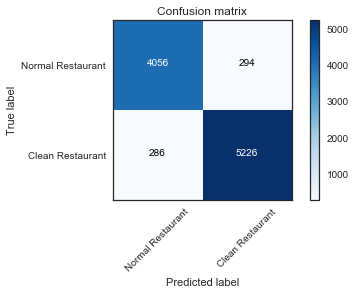

In [156]:
y_pred_train = log_model.predict(X_train)
y_pred_valid = log_model.predict(X_valid)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_valid = metrics.accuracy_score(y_valid, y_pred_valid)
rp = metrics.classification_report(y_valid, y_pred_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_train))
print("Accuracy score on valid data: {:5f}".format(acc_valid))
print("Classification Report:")
print(rp)
print("_____________________________________________________________")

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()


In [151]:
clf_svc = svm.SVC(kernel = 'linear', random_state = 0)
clf_svc.fit(X_train, y_train)
y_pred_svc_train = clf_svc.predict(X_train)
y_pred_svc_valid = clf_svc.predict(X_valid)


_____________________________________________________________
Accuracy score on train data: 0.944326
Accuracy score on valid data: 0.942304
Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.93      0.93      4350
          1       0.95      0.95      0.95      5512

avg / total       0.94      0.94      0.94      9862

_____________________________________________________________


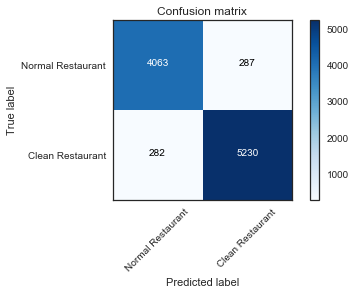

In [157]:
acc_svm_train = metrics.accuracy_score(y_train,y_pred_svc_train)
acc_svm_valid = metrics.accuracy_score(y_valid,y_pred_svc_valid)

svm_rp = metrics.classification_report(y_valid, y_pred_svc_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_svm_train))
print("Accuracy score on valid data: {:5f}".format(acc_svm_valid))
print("Classification Report:")
print(svm_rp)
print("_____________________________________________________________")
# Compute confusion matrix
cm_svm = confusion_matrix(y_valid, y_pred_svc_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [ ]:
y_pred_nb_train = bernb.predict(X_train)
y_pred_nb_valid = bernb.predict(X_valid)





acc_svm_train = metrics.accuracy_score(y_train,y_pred_svc_train)
acc_svm_valid = metrics.accuracy_score(y_valid,y_pred_svc_valid)

svm_rp = metrics.classification_report(y_valid, y_pred_svc_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_svm_train))
print("Accuracy score on valid data: {:5f}".format(acc_svm_valid))
print("Classification Report:")
print(svm_rp)
print("_____________________________________________________________")
# Compute confusion matrix
cm_svm = confusion_matrix(y_valid, y_pred_svc_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [159]:
from sklearn.naive_bayes import BernoulliNB

berNB = BernoulliNB()
berNB.fit(X_train,y_train)

y_pred_nb_train = berNB.predict(X_train)
y_pred_nb_valid = berNB.predict(X_valid)

#f1_score = f1_score(y_test,y_pred,average= 'weighted')
#print(f1_score)

#y_pred = multiNB.predict(X_test)
#accuracy = accuracy_score(y_test,y_pred)
#print(accuracy)

_____________________________________________________________
Accuracy score on train data: 0.913903
Accuracy score on valid data: 0.920199
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.89      0.91      4350
          1       0.92      0.94      0.93      5512

avg / total       0.92      0.92      0.92      9862

_____________________________________________________________


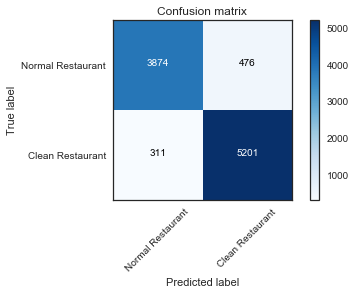

In [160]:
acc_svm_train = metrics.accuracy_score(y_train,y_pred_nb_train)
acc_svm_valid = metrics.accuracy_score(y_valid,y_pred_nb_valid)

svm_rp = metrics.classification_report(y_valid, y_pred_nb_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_svm_train))
print("Accuracy score on valid data: {:5f}".format(acc_svm_valid))
print("Classification Report:")
print(svm_rp)
print("_____________________________________________________________")
# Compute confusion matrix
cm_nb = confusion_matrix(y_valid, y_pred_nb_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_nb, classes=class_names,
                      title='Confusion matrix')
plt.show()